Tópico 1 - Base de dados:

In [28]:
#Bibliotecas:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [3]:
#Importando os dados:
url = (r'Country-data.csv')
df = pd.read_csv(url)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#Quantos países existem no dataset?
df["country"].unique().size

167

Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

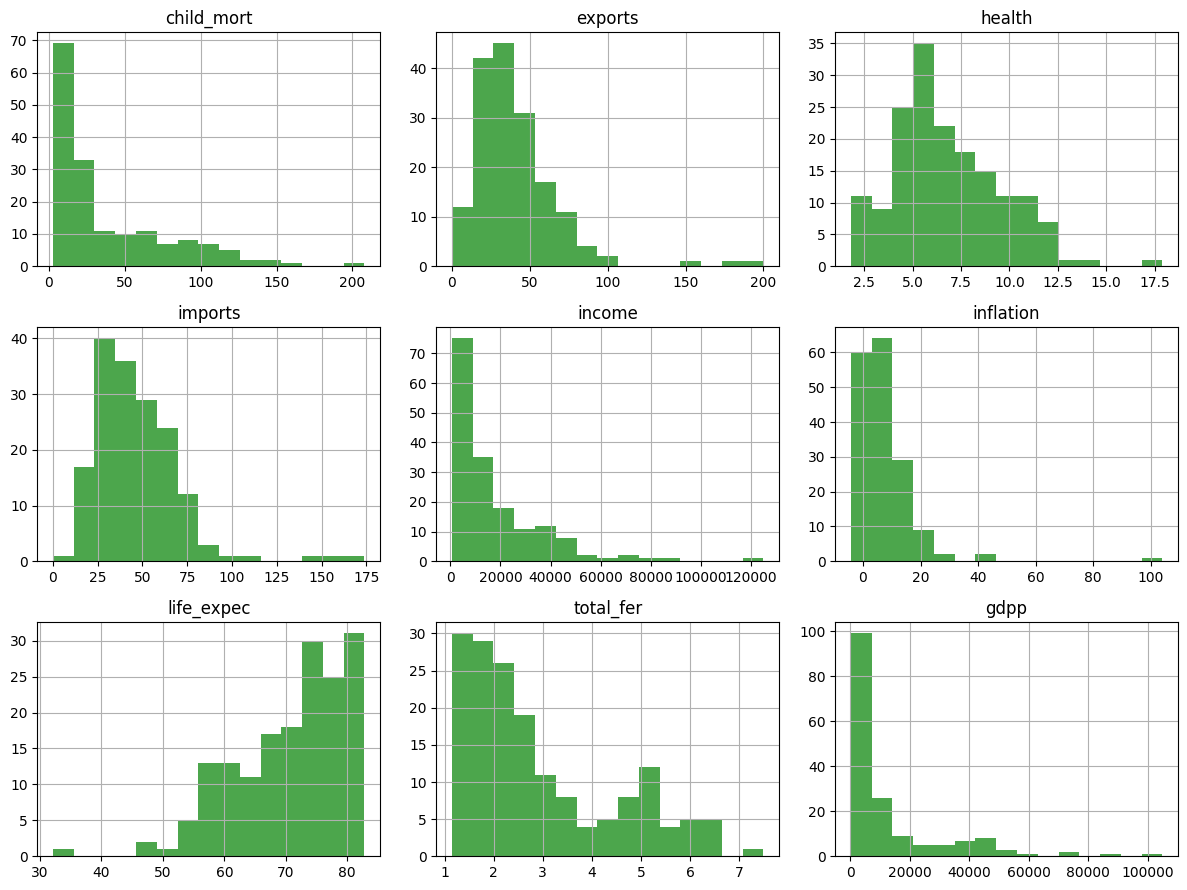

In [8]:
# Apresentando os graficos das features usadas para o k-mean posteriormente:

colunas = df.columns[1:]
num_colunas_por_linha = 3
num_linhas = len(colunas) // num_colunas_por_linha + (1 if len(colunas) % num_colunas_por_linha > 0 else 0)
fig, axs = plt.subplots(num_linhas, num_colunas_por_linha, figsize=(12, 3 * num_linhas))
#Achatando a figura
axs = axs.flatten()
#Criando o histograma
for i, coluna in enumerate(colunas):
    ax = axs[i]
    ax.hist(df[coluna], bins=15, color='green', alpha=0.7)
    ax.set_title(coluna)
    ax.grid(True)
#layout:
plt.tight_layout()
plt.show()

Os dados apresentam grande amplitude de valores dentro e não seguem distribuição normal visivelmente. é importante normalizarmos. Pois estamos usando um algoritimo que itera sobre distancias e ele ficaria desbalanceado sem a nornmalização. Ela traz os valores para um mesmo intervalo mantendo suas distribuições.

In [9]:
#Normalizando os dados nas variavieis relevantes:
df_mod = df[df.columns[1:]]
Scaler = StandardScaler().fit(df_mod)
X = Scaler.transform(df_mod)


Questão: Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
K-Médias

In [12]:
#Fit do k - means:
kmeans = KMeans(n_clusters= 3).fit(X)
#Vendo os grupos preditos:
y_kmeans = kmeans.predict(X)
y_kmeans

c:\Users\katia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [16]:
#Adiciona a base a classiicação do k means
df_mod['class_kmeans'] = y_kmeans
df_mod.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class_kmeans
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [18]:
#Vendo quantos foram classdicados em cada classe:
df_mod.groupby('class_kmeans').size()
     

class_kmeans
0    84
1    47
2    36
dtype: int64

In [19]:
#Vendo a metrica da silhueta:
silhouete_kmeans = silhouette_score(X, y_kmeans)

silhouete_kmeans

0.28329575683463126

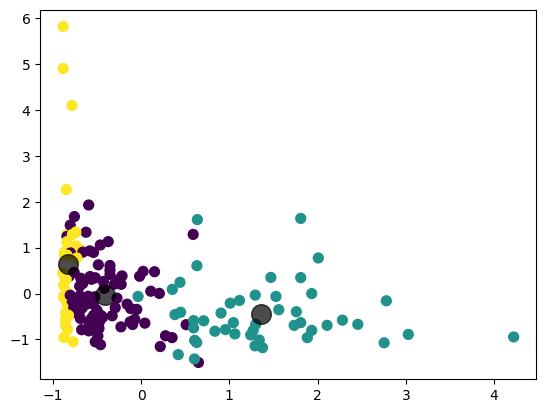

In [20]:
# Ilustrndo distribuição dos clusters para o centroides:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

In [ ]:
Para os resultados, do K-Médias:
Interprete cada um dos clusters obtidos citando:
Qual a distribuição das dimensões em cada grupo;

In [30]:
#Definindo uma função que plotará os histogramas:
def plot_histograma(dataframe, features):
    #Linhas e colunas
    num_plots = len(features)
    num_cols = 3  # Defina o número desejado de colunas
    num_rows = -(-num_plots // num_cols)  # Cálculo de linhas necessárias

    #ajustes do grafico
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)
    if num_plots == 1:
        axes = [axes]

    for col, ax in zip(features, [item for sublist in axes for item in sublist]):
        sns.histplot(dataframe[col], ax=ax, kde=True)
        ax.set_title(f'Histograma de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequência')

    # Ajusta o layout final
    plt.tight_layout()
    plt.show()

In [26]:
features_df = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

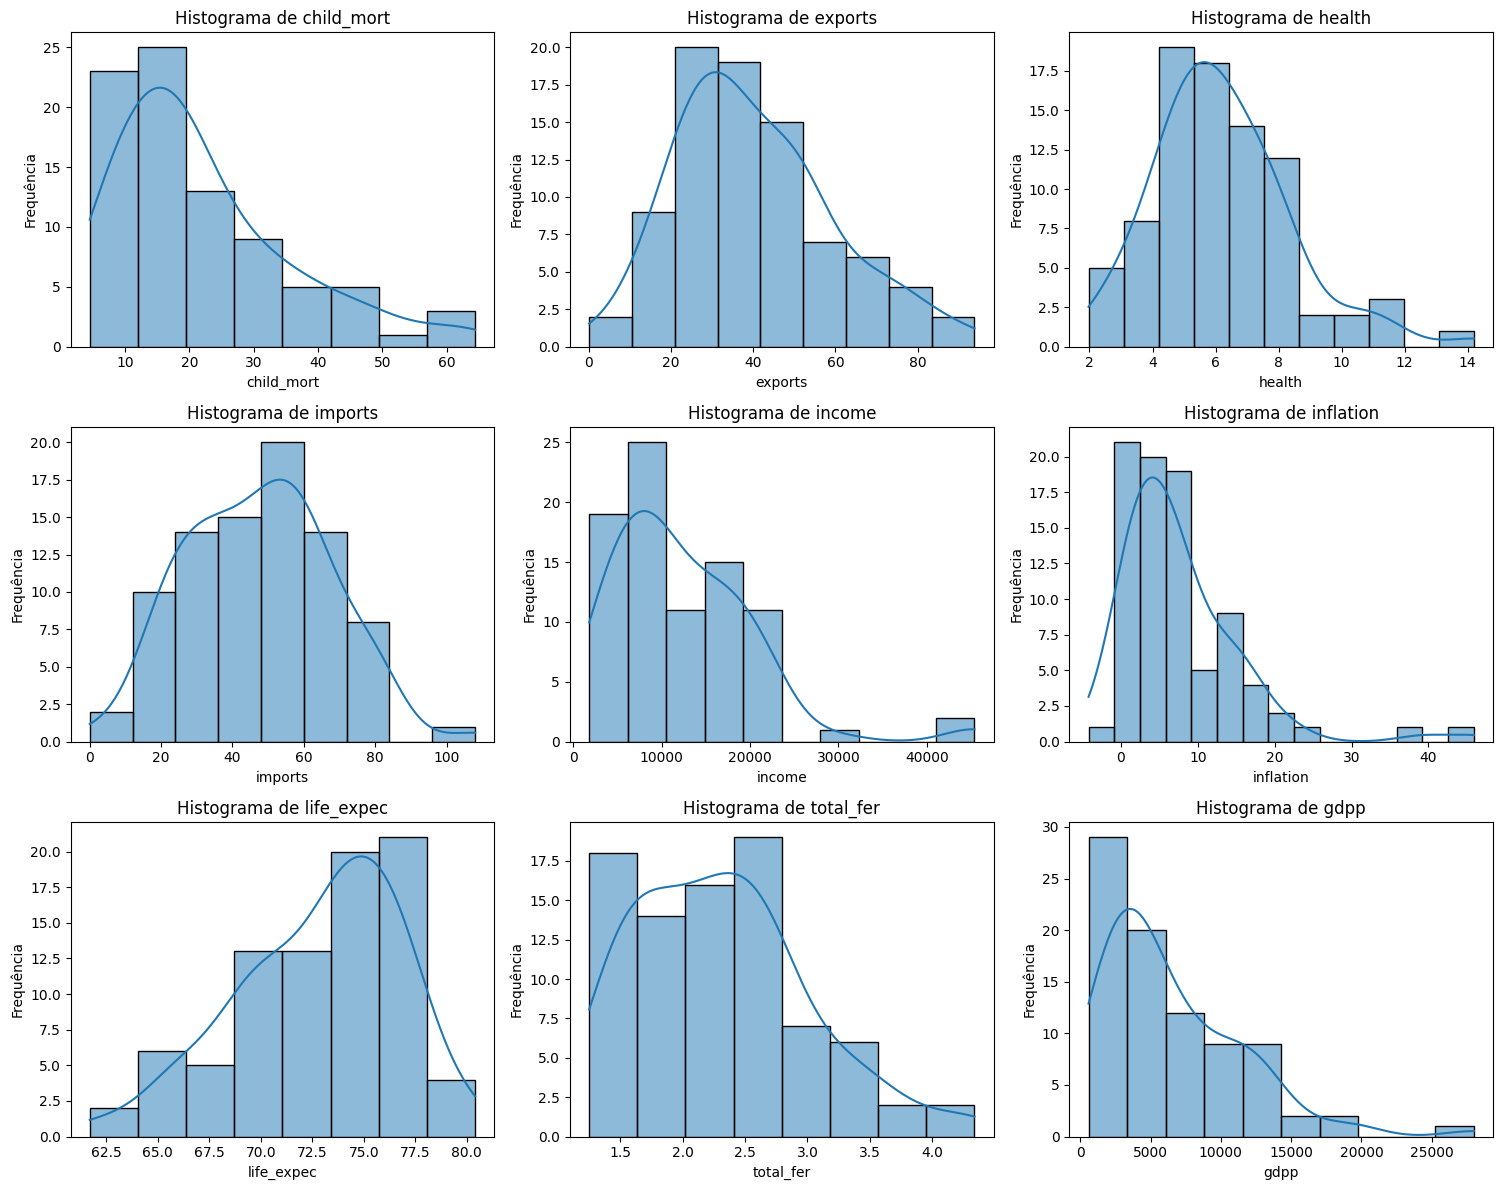

In [31]:
# Para o grupo 0:
df_class_0 = df_mod[df_mod['class_kmeans'] == 0]

df_class_0.head()
plot_histograma(df_class_0,features_df)

In [ ]:
#Para o grupo 1:
df_class_1 = df_mod[df_mod['class_kmeans'] == 1]

df_class_1.head()
plot_histograma(df_class_1,features_df)

In [ ]:
#Para o grupo 2:
df_class_2 = df_mod[df_mod['class_kmeans'] == 2]

df_class_2.head()
plot_histograma(df_class_2,features_df)

O país, de acordo com o algoritmo que melhor representa o seu agrupamento. Justifique.
Comforme apresentado abaixo, os resultados foram: Suriname, Israek e Iraque respectivamente para os grupos 0, 1 e 2.
Isso se dá pois são os países encontrados com menor distancia para o centroide do seu cluster.

In [33]:
df_mod2 = df.copy()
df_mod2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [32]:
# Dsitancia de cada amostra pro cluster:
dist_cent = kmeans.fit_transform(X)**2
dist_cent
dist_cent_1 = dist_cent.sum(axis= 1)

dist_cent_1


c:\Users\katia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([ 48.35145195,  23.81528025,  25.83238414,  62.71219336,
        21.98200903,  31.17088674,  27.14942386,  46.37555906,
        44.39929822,  24.29580033,  22.18767998,  27.68202343,
        32.69101459,  22.03204806,  26.3718065 ,  47.42989633,
        23.27288401,  47.05697585,  24.1138603 ,  22.51520793,
        33.15426869,  24.99309517,  31.21696304,  66.70002001,
        22.86699059,  52.40243919,  60.31116781,  24.00850381,
        47.67002739,  45.65786063,  26.04999786,  80.78702915,
        70.49668061,  23.5604193 ,  28.09509071,  28.42711423,
        35.90815192,  59.99214521,  50.22731614,  30.2645823 ,
        46.01906795,  23.67918655,  29.77984587,  29.06773902,
        50.1694912 ,  21.28630787,  22.14258611,  25.15445688,
        22.28427327,  55.40981873,  44.90664088,  29.15575307,
        24.94261644,  36.91764416,  43.72002309,  33.67615164,
        36.99770061,  25.54335136,  43.11797317,  31.66228098,
        34.33908041,  22.4334713 ,  20.97048878,  47.66

In [35]:
df_mod2['dist'] = dist_cent_1
df_mod2['cluster'] = y_kmeans

df_mod2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,48.351452,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,23.815280,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,25.832384,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,62.712193,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,21.982009,0


In [38]:
#Descobrindo a menor distancia para o cluster = 0:
df_mod2[df_mod2['cluster'] == 0]['dist'].min()
min_clsuter_0 = df_mod2[df_mod2['cluster'] == 0]['dist'].min()


In [39]:
#Descobrindo o indice da menor distancia do 0:
country_cluster_0 = df_mod2[(df_mod2['dist'] == min_clsuter_0) & (df_mod2['cluster'] == 0)]

country_cluster_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist,cluster
143,Suriname,24.1,52.5,7.01,38.4,14200,7.2,70.3,2.52,8300,18.056236,0


In [40]:
#Descobrindo a menor distancia para o cluster = 1:
df_mod2[df_mod2['cluster'] == 1]['dist'].min()
min_clsuter_1 = df_mod2[df_mod2['cluster'] == 1]['dist'].min()


In [41]:
#Descobrindo o indice da menor distancia do 1:
country_cluster_1 = df_mod2[(df_mod2['dist'] == min_clsuter_1) & (df_mod2['cluster'] == 1)]

country_cluster_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist,cluster
72,Iraq,36.9,39.4,8.41,34.1,12700,16.6,67.2,4.56,4500,24.80202,1


In [42]:
#Descobrindo a menor distancia para o cluster = 2:
df_mod2[df_mod2['cluster'] == 2]['dist'].min()
min_clsuter_2 = df_mod2[df_mod2['cluster'] == 2]['dist'].min()


In [43]:
#Descobrindo o indice da menor distancia do 1:
country_cluster_2 = df_mod2[(df_mod2['dist'] == min_clsuter_2) & (df_mod2['cluster'] ==2)]

country_cluster_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist,cluster
74,Israel,4.6,35.0,7.63,32.9,29600,1.77,81.4,3.03,30600,26.700787,2


In [ ]:
Fazendo a parte da classificação hieraquica:

In [44]:
hier_cust = AgglomerativeClustering(n_clusters= 3).fit(X)
y_hc = hier_cust.fit_predict(X)
y_hc
     

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [45]:
#Definindo uma função para plotar o dendograma:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
     

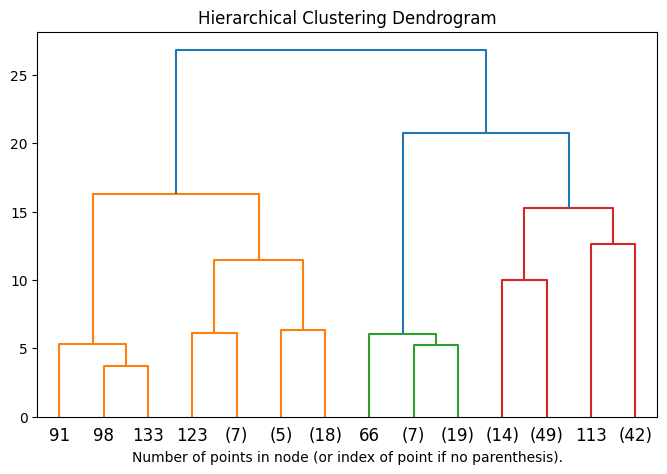

In [46]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.figure(figsize=(8, 5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [47]:
#Vendo a metrica da silhueta:
silhouete_hc = silhouette_score(X, y_hc)

silhouete_hc

0.24563001303300652

#Comparando a metrica da silhueta do k_means e do dendograma e mostrando similaridades e diferenças dos modelos:
A metrica da Silhueta indica a qualidade da classificação variando de -1 a 1. Pelos resultado abaixo o metodo K-means se mostrou u, pouco melhor.
Poderiamos fazer uma função que compare os grupos classificados em kmeans e na classificação hieraquica, porem isso não foi feito.
Genericamente podemos falar que no kmeans eu escolho o numero de agrupamentos enquanto na hieraquica o modelo cria uma estrutura de acordo com os dados agrupaando rescursivamente ate que todos pertencam a um so cluster.

In [48]:
#Comparando a metrica da silhueta do k_means e do dendograma:
print(f'Métrica silhueta K-Means: {silhouete_kmeans}')
print(f'Métrica silhueta Hierarchical Clustering: {silhouete_hc}')


Métrica silhueta K-Means: 0.28329575683463126
Métrica silhueta Hierarchical Clustering: 0.24563001303300652


1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
 - Divide os dados em k clusters definidos pelo humano
 - Inicializa k centroides aleatorios e atribui cada ponto aos centroide mais proximos
 - Recalcula os centróides como a média dos pontos atribuídos a cada cluster e repete o processo até a convergência.
Observações: assume que os clusters são esfericos e de tamnhos semelhantes e cada inicialização dos centroides dá um agrupamento final diferente.

3.  O algoritmo de K-médias é sensível a outliers nos dados. Explique.

Ele é sensivel a outliers pois como já dito ele usa a distancia euclidiana dos pontos ao centroides.A distância euclidiana é fortemente influenciada por outliers, pois estes são pontos que estão muito distantes da maioria dos dados.
Para o recalculo dos centroides ele usa a média dos pontos do cluster, logo outleirs vao influenciar fortemente nesse caso, afetando a posição final do centroide.
Uma solução é fazer o pre processamento dos dados com normalização ou até mesmo remoção de outliers.


4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?

O metodo DBSACN agrupa pontos de dados com alta densidade e marca pontos em áreas de baixa densidade como ruído. Dessa forma, os outleirs podem mais facilmente ser classidficados como ruidos não influenciando na formação do cluster. O metodo não precisa de um numero pre definido de clusters e tem os parametros raio de vizinhança e numero mínimo de pontos para o controle de sensibilidade.

    